In [1]:
"""
Compute the scattering transform of a speech recording
======================================================
This script loads a speech signal consisting of an excerpt from a recording of
*Sense and Sensibility*. We then compute its scattering transform, and display
the zeroth-, first-, and second-order scattering coefficients.
"""

###############################################################################
# Preliminaries
# -------------
#
###############################################################################
# To manipulate the audio signal, we first import NumPy. We also import
# `librosa`, which allows us to automatically download the example signal.

import numpy as np
import librosa

###############################################################################
# We import `matplotlib` to plot the calculated scattering coefficients.

import matplotlib.pyplot as plt

###############################################################################
# Finally, we import the `Scattering1D` class from the `scattering` package.
# The `Scattering1D` class is what lets us calculate the scattering transform

from kymatio.numpy import Scattering1D

In [4]:
###############################################################################
# Scattering setup
# ----------------
# First, we download the signal and extract the second second of it (the first
# second is mostly silence).

x, sr = librosa.load(librosa.example("libri3"))
x = x[sr:2 * sr]

###############################################################################
# Once the recording is in memory, we normalize it.

x = x / np.max(np.abs(x))

###############################################################################
# We are now ready to set up the parameters for the scattering transform.
# First, the number of samples, `T`, is given by the size of our input `x`.
# The averaging scale is specified as a power of two, `2**J`. Here, we set
# `J = 6` to get an averaging, or maximum, scattering scale of `2**6 = 64`
# samples. Finally, we set the number of wavelets per octave, `Q`, to `16`.
# This lets us resolve frequencies at a resolution of `1/16` octaves.
print(x.shape)
T = x.shape[-1]
J = 6
Q = 16

###############################################################################
# Finally, we are able to create the object which computes our scattering
# transform, `scattering`.

scattering = Scattering1D(J, T, Q)

###############################################################################
# Compute and display the scattering coefficients
# -----------------------------------------------
# Computing the scattering transform of a signal is achieved using the
# `__call__` method of the `Scattering1D` class. The output is an array of
# shape `(C, T)`. Here, `C` is the number of scattering coefficient outputs,
# and `T` is the number of samples along the time axis. This is typically much
# smaller than the number of input samples since the scattering transform
# performs an average in time and subsamples the result to save memory.

Sx = scattering(x)

(22050,)


In [5]:
print(Sx.shape)

(222, 345)


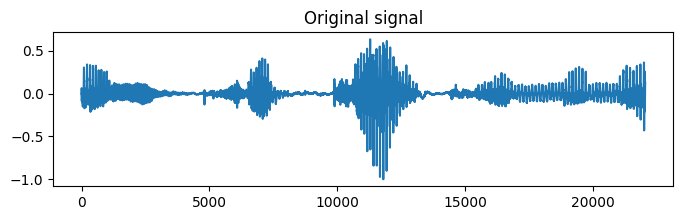

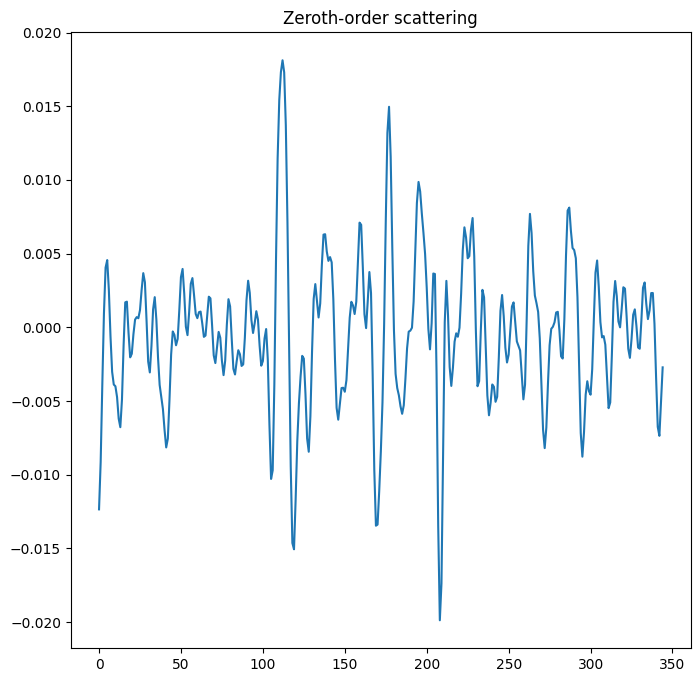

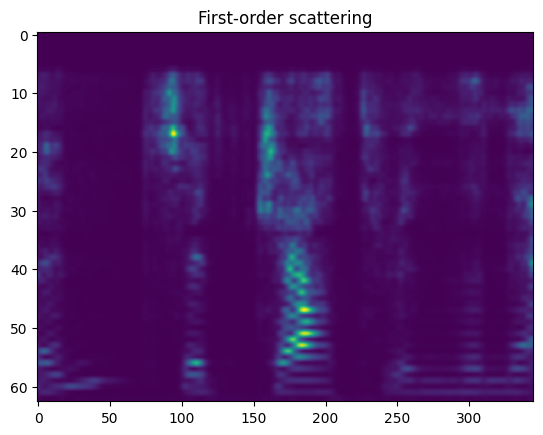

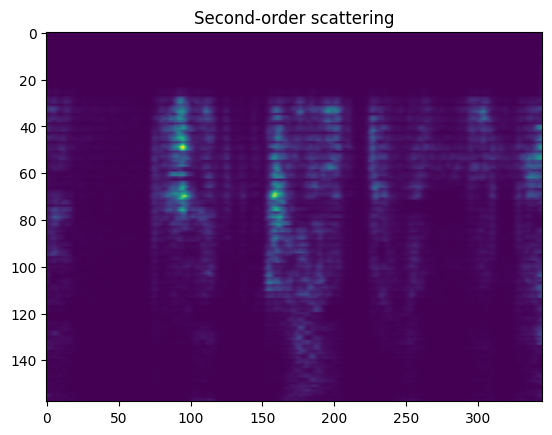

In [3]:

###############################################################################
# To display the scattering coefficients, we must first identify which belong
# to each order (zeroth, first, or second). We do this by extracting the `meta`
# information from the scattering object and constructing masks for each order.

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

###############################################################################
# First, we plot the original signal `x`.

plt.figure(figsize=(8, 2))
plt.plot(x)
plt.title('Original signal')
plt.show()

###############################################################################
# We now plot the zeroth-order scattering coefficient, which is simply an
# average of the original signal at the scale `2**J`.

plt.figure(figsize=(8, 8))
plt.plot(Sx[order0][0])
plt.title('Zeroth-order scattering')
plt.show()

###############################################################################
# We then plot the first-order coefficients, which are arranged along time
# and log-frequency.

plt.imshow(Sx[order1], aspect='auto')
plt.title('First-order scattering')
plt.show()

###############################################################################
# Finally, we plot the second-order scattering coefficients. These are also
# organized aling time, but has two log-frequency indices: one first-order
# frequency and one second-order frequency. Here, both indices are mixed along
# the vertical axis.

plt.imshow(Sx[order2], aspect='auto')
plt.title('Second-order scattering')
plt.show()

In [10]:
print(Sx[order0].shape)

(1, 345)
